<a href="https://colab.research.google.com/github/klajdikaciu/ComputerVision/blob/main/TestSolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
from skimage import data
import numpy as np
from skimage.util import img_as_ubyte

# Task 1

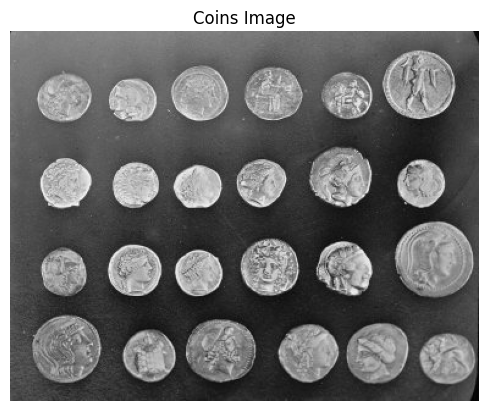

Image shape (height, width): (303, 384)
Pixel value range: min = 1, max = 252


In [5]:
coins = data.coins()

plt.imshow(coins, cmap='gray')
plt.title('Coins Image')
plt.axis('off')
plt.show()

print(f"Image shape (height, width): {coins.shape}")
print(f"Pixel value range: min = {coins.min()}, max = {coins.max()}")

# Task 2

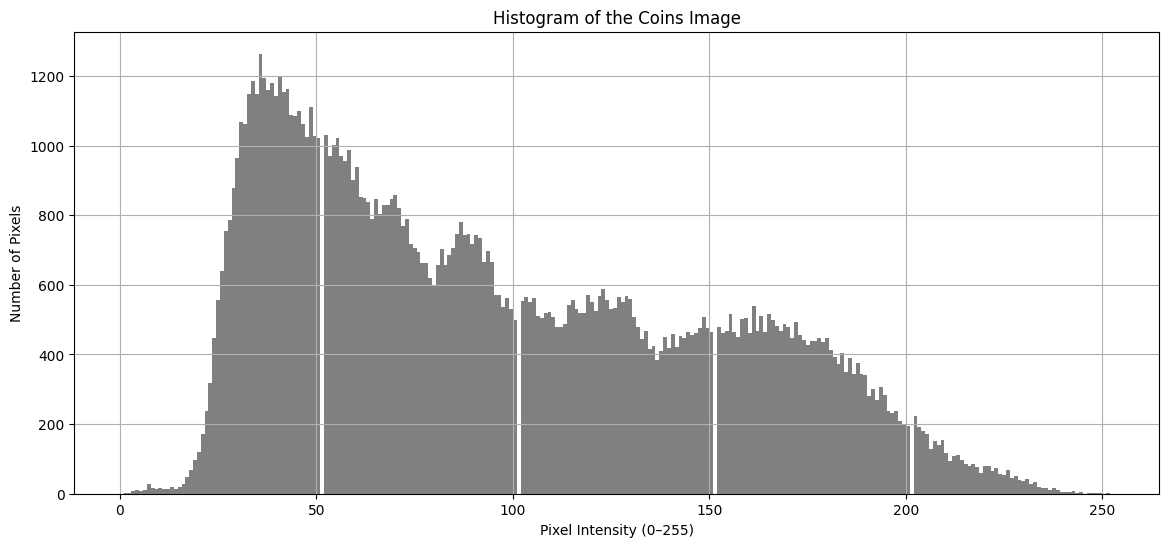

In [7]:
IGB = data.coins()

v = IGB.reshape(IGB.shape[0] * IGB.shape[1], 1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256, density=False, color='gray')
plt.title('Histogram of the Coins Image')
plt.xlabel('Pixel Intensity (0–255)')
plt.ylabel('Number of Pixels')
plt.grid(True)
plt.show()

The histogram shows two peaks: one for the darker background at lower
intensities, and another for the brighter coins at higher intensities.
In the histogram, the lower intensity peaks represent the darker background, while the higher intensity peaks correspond to the brighter coins.

## Task3

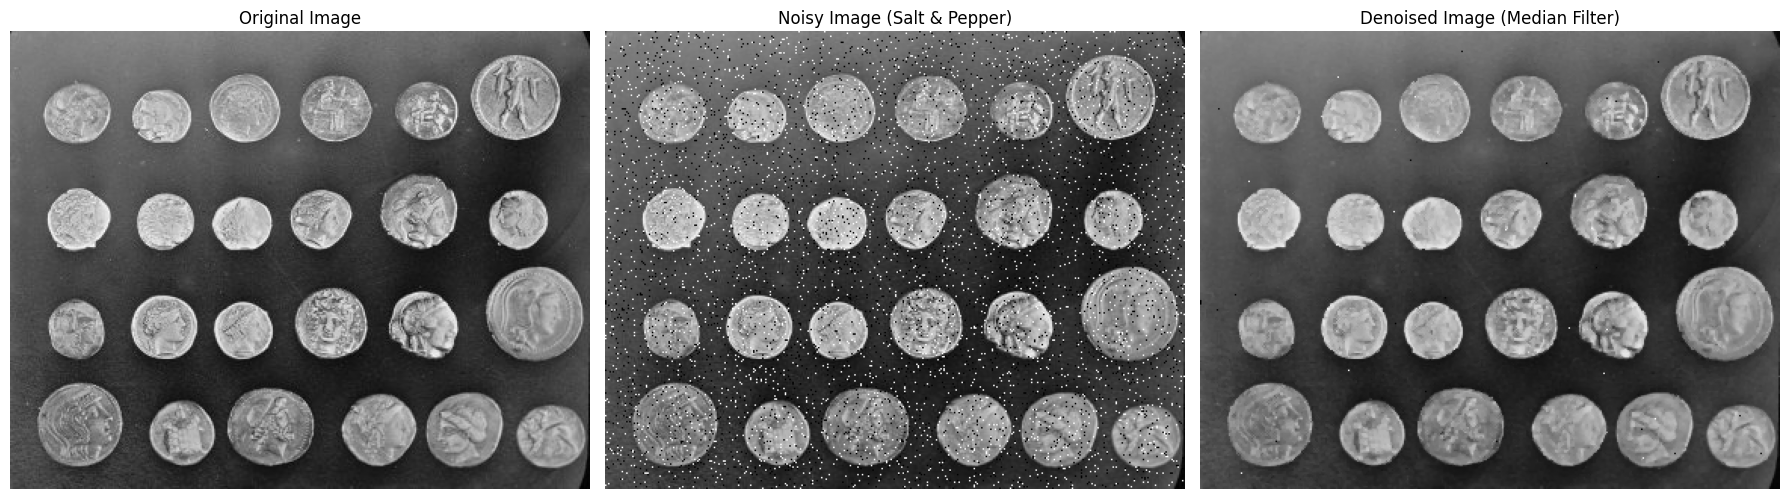

In [8]:
import matplotlib.pyplot as plt
from skimage import data, util, filters, restoration
from skimage.filters import median
from skimage.morphology import disk

original = data.coins()

noisy = util.random_noise(original, mode='s&p')

denoised = median(noisy, disk(1))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(original, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(noisy, cmap='gray')
axes[1].set_title("Noisy Image (Salt & Pepper)")
axes[1].axis('off')

axes[2].imshow(denoised, cmap='gray')
axes[2].set_title("Denoised Image (Median Filter)")
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Task4

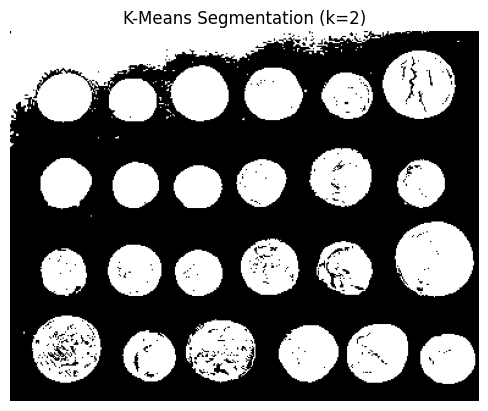

In [10]:
import numpy as np
from sklearn.cluster import KMeans

flat_image = original.reshape((-1, 1))

kmeans = KMeans(n_clusters=2, random_state=0).fit(flat_image)
segmented = kmeans.labels_.reshape(original.shape)

plt.imshow(segmented, cmap='gray')
plt.title("K-Means Segmentation (k=2)")
plt.axis('off')
plt.show()

Since K=2, it segments the image into foreground (coins) and background.

# Task5

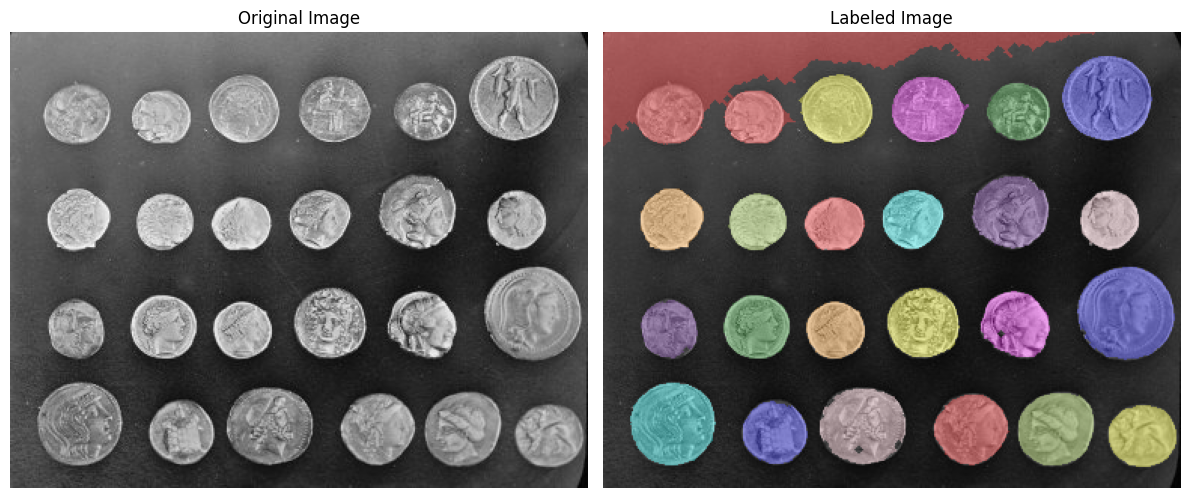

Number of coins detected: 23


In [21]:
from skimage.filters import threshold_otsu
import numpy as np

thresh = threshold_otsu(denoised)
binary = denoised > thresh
from skimage.morphology import remove_small_objects, closing, disk

cleaned = remove_small_objects(closing(binary, disk(2)), min_size=100)
from skimage.morphology import remove_small_objects, closing, disk

cleaned = remove_small_objects(closing(binary, disk(2)), min_size=100)


from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt

labels = label(cleaned)
image_label_overlay = label2rgb(labels, image=image, bg_label=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_label_overlay)
axes[1].set_title('Labeled Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

regions = regionprops(labels)
num_coins = len(regions)
print(f"Number of coins detected: {num_coins}")


# Task6

Average Area: 2054.96
Average Major Axis Length: 57.97
Average Orientation: 0.26 rad


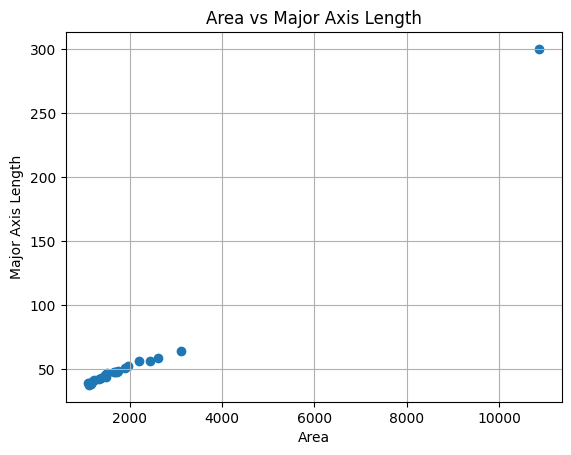

In [23]:
from skimage.measure import regionprops

regions = regionprops(labels)

areas = [r.area for r in regions]
majors = [r.major_axis_length for r in regions]
orientations = [r.orientation for r in regions]

print(f"Average Area: {np.mean(areas):.2f}")
print(f"Average Major Axis Length: {np.mean(majors):.2f}")
print(f"Average Orientation: {np.mean(orientations):.2f} rad")

plt.scatter(areas, majors)
plt.xlabel("Area")
plt.ylabel("Major Axis Length")
plt.title("Area vs Major Axis Length")
plt.grid(True)
plt.show()


# Task7

In [24]:
big_regions = [r for r in regions if r.area > 1750]
num_big_coins = len(big_regions)
print(f"Number of coins with area > 1750: {num_big_coins}")


Number of coins with area > 1750: 7


# Task 8

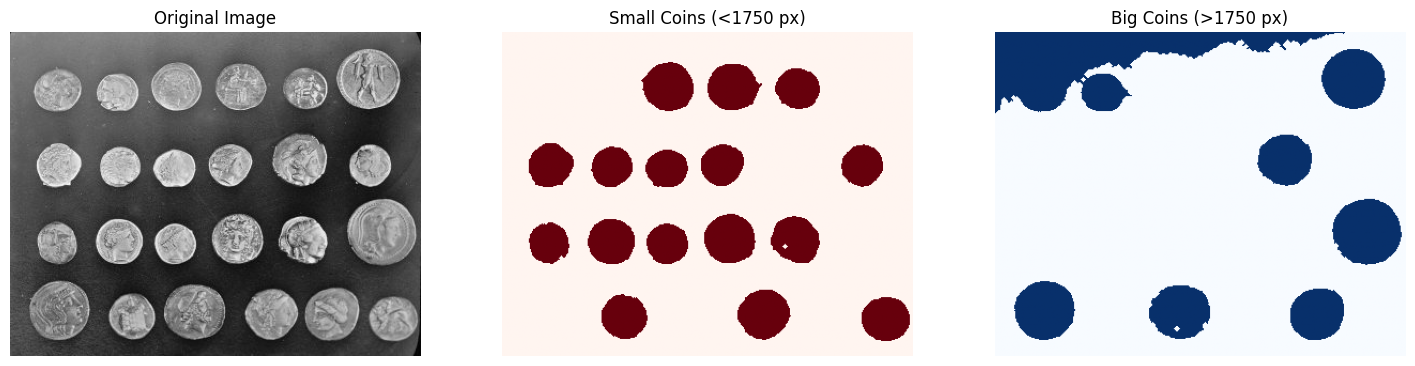

In [25]:
from skimage.color import label2rgb

small_mask = np.zeros_like(labels, dtype=bool)
big_mask = np.zeros_like(labels, dtype=bool)

for region in regions:
    if region.area > 1750:
        big_mask[labels == region.label] = True
    else:
        small_mask[labels == region.label] = True

overlay = np.zeros((*labels.shape, 3), dtype=np.uint8)
overlay[small_mask] = [255, 0, 0]
overlay[big_mask] = [0, 0, 255]

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(small_mask, cmap='Reds')
ax[1].set_title("Small Coins (<1750 px)")
ax[1].axis('off')

ax[2].imshow(big_mask, cmap='Blues')
ax[2].set_title("Big Coins (>1750 px)")
ax[2].axis('off')
plt.show()


# Task9

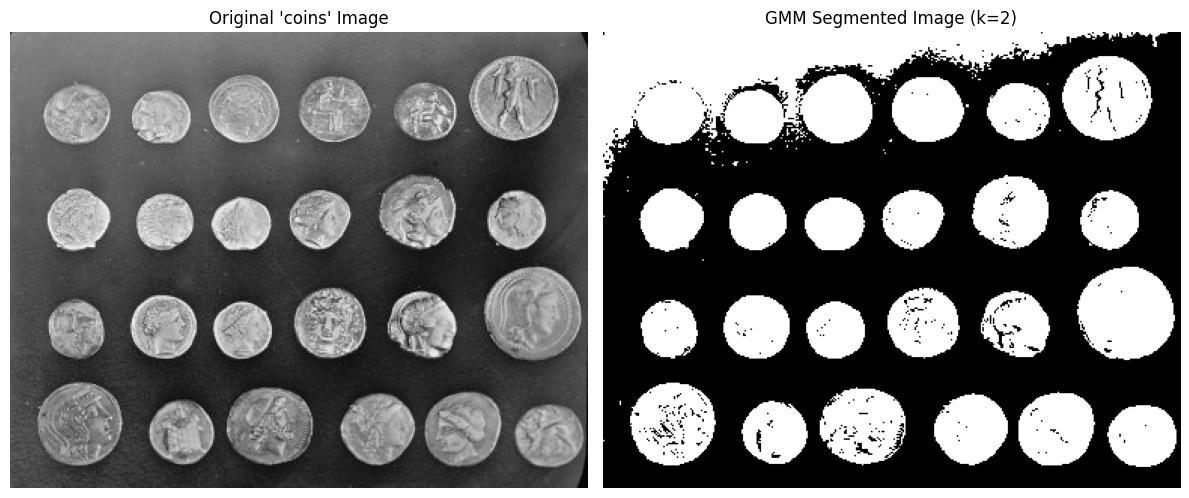

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.mixture import GaussianMixture

image = data.coins()

X = image.reshape(-1, 1)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

segmented = labels.reshape(image.shape)

if np.mean(image[segmented == 0]) > np.mean(image[segmented == 1]):
    segmented = 1 - segmented


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original 'coins' Image")
ax[0].axis('off')

ax[1].imshow(segmented, cmap='gray')
ax[1].set_title("GMM Segmented Image (k=2)")
ax[1].axis('off')

plt.tight_layout()
plt.show()


Step 1: Load grayscale coins image
Step 2: Flatten image and normalize pixel intensities
Step 3: Apply Gaussian Mixture Model with 2 clusters
Step 4: Reshape labels to original image shape
Step 5: Visualize results

# Task10

In [27]:
from skimage.feature import graycomatrix, graycoprops

glcm = graycomatrix(image, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print(f"Contrast: {contrast:.2f}")
print(f"Dissimilarity: {dissimilarity:.2f}")
print(f"Homogeneity: {homogeneity:.2f}")
print(f"Energy: {energy:.2f}")
print(f"Correlation: {correlation:.2f}")

Contrast: 1469.68
Dissimilarity: 20.30
Homogeneity: 0.13
Energy: 0.01
Correlation: 0.74


I really enjoyed this Computer Vision course. It was super interesting, and I picked up so many new things! What really blew me away was seeing how Computer Vision is being used in medicine, that was just incredible to learn about. And honestly, the professor was great, so nice and easygoing, which made everything even better.